In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('friends script final.csv').drop('Unnamed: 0', axis=1)
df = df.replace({r'\r\n': ' '}, regex=True)

In [23]:
df['character'] = df['character'].apply(lambda x: x.capitalize().strip())
df.character.value_counts()[:6]

Rachel      8488
Ross        8386
Chandler    7688
Monica      7641
Joey        7563
Phoebe      6815
Name: character, dtype: int64

In [29]:
mispell_name = {'Rach': 'Rachel', 'Mnca': 'Monica', 'Phoe': 'Phoebe', 'Chan': 'Chandler'}
for name in mispell_name:
    df['character'] = df['character'].replace(name, mispell_name[name])

In [30]:
data = df[df['character'].isin(['Rachel', 'Ross', 'Chandler', 'Monica', 'Joey', 'Phoebe'])]

In [ ]:
data[data['character'] == 'Ross']['line']

In [6]:
data.head()

,character,line,title
1,Monica,There's nothing to tell! He's just some guy I...,The One Where Monica Gets a New Roomate (The P...
2,Joey,"C'mon, you're going out with the guy! There's...",The One Where Monica Gets a New Roomate (The P...
3,Chandler,"All right Joey, be nice. So does he have a h...",The One Where Monica Gets a New Roomate (The P...
4,Phoebe,"Wait, does he eat chalk?",The One Where Monica Gets a New Roomate (The P...
5,Phoebe,"Just, 'cause, I don't want her to go through ...",The One Where Monica Gets a New Roomate (The P...


In [32]:
df.title.value_counts()[-30:]

The One With Ross' New Girlfriend           229
The One With The Fake Monica                227
The One With the Last                       226
The One With Phoebes Uterus                225
The One With The Butt                       220
The One Where Theyre Up All Night          218
The One With the Breast Milk                217
904 - The One With The Sharks               213
The One With the Candy Hearts               206
The One Where Mr. Heckles Dies              199
Friends: The Stuff Youve Never Seen        188
913 - The One Where Monica Sings             74
The One With Two Parts, part 1               17
The One With Phoebe's Dad                     6
The One Where Ross Finds Out                  5
The One With Barry and Mindy's Wedding        3
The One Where Ross and Rachel...You Know      3
The One Where Joey Moves Out                  2
The One Where Dr. Remore Dies                 1
The One After the Superbowl                   1
The One With Phoebe's Husband           

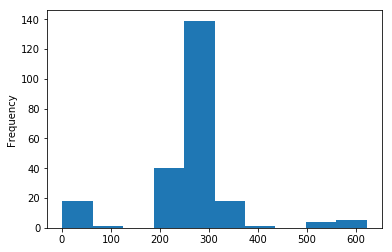

In [35]:
df.title.value_counts().plot.hist();

Ada beberapa episode dengan jumlah percakapan yang kurang dari 200. hal ini disebabkan karena pada proses parsing, beberapa script tidak memiliki tag untuk setiap percakapan, sehingga terabaikan.

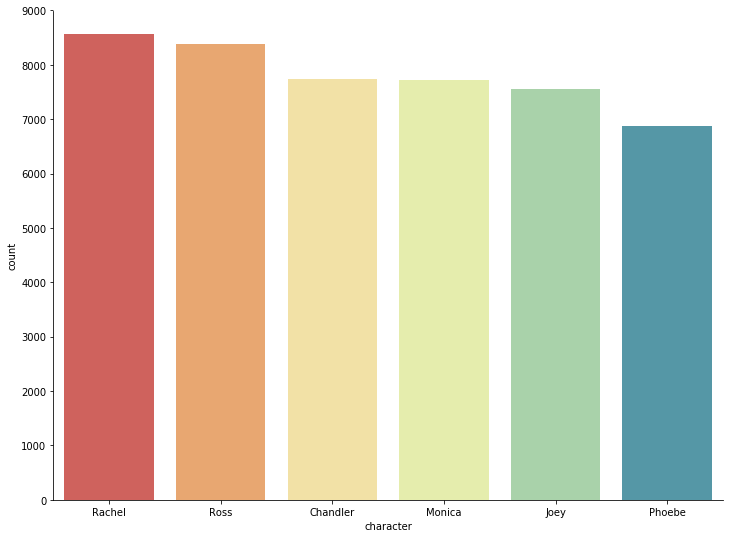

In [36]:
fig, ax = plt.subplots(figsize=(12,9))
sns.countplot(x=data['character'], ax=ax, palette='Spectral', order=data.character.value_counts().index)
sns.despine();

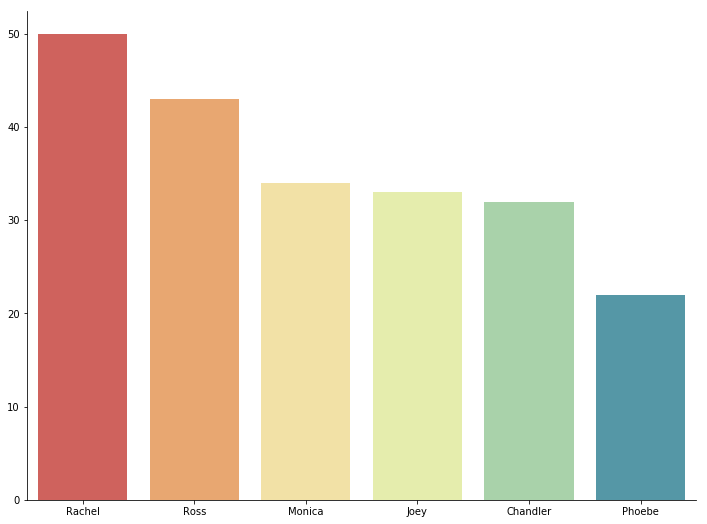

In [97]:
pivoted = data.pivot_table(index='title', columns = 'character', values='line', aggfunc='count').idxmax(axis=1).value_counts()

fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(pivoted.index, pivoted.values, ax=ax, palette='Spectral');
sns.despine();

Ternyata rachel memiliki jumlah episode terbanyak (episode dipilih berdasarkan line terbanyak karakter)

In [37]:
'''ten_title = data.title.unique()[50:60]
data_10_title = data[data['title'].isin(ten_title)]

g = sns.FacetGrid(data_10_title, col="title", col_wrap=2, size=4, aspect=2, sharex=False)
g.map(sns.countplot, 'character');'''

'ten_title = data.title.unique()[50:60]\ndata_10_title = data[data[\'title\'].isin(ten_title)]\n\ng = sns.FacetGrid(data_10_title, col="title", col_wrap=2, size=4, aspect=2, sharex=False)\ng.map(sns.countplot, \'character\');'

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob("a little bit a very great calculation").sentiment